<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="tu-dresden-blue.png" alt="drawing" width="200"/>
<img src="ogs-teaching.png" alt="drawing" width="200"/>

Professur für Angewandte Umweltsystemanalyse an der TU Dresden <br/>
Prof. Dr.-Ing. habil. Olaf Kolditz <br/>
***Hydroinformatik (UW-BHW-414)*** <br/>
*[Lehre-Webseite](https://www.ufz.de/index.php?de=40425)*

***Lea Stricker***

***Übung HA01: Skalarprodukt***

Schreiben sie das Skalarprodukt $\nabla\cdot\mathbf{v}$ in Komponentenschreibweise.

$\nabla\cdot\mathbf{v}$ = $\frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y} + \frac{\partial v_z}{\partial z}$

***Übung HA02: Kontinuumsmechanik***

Was ist $\mathbf v \cdot \nabla \psi$ ? <br/>
Dieser Ausdruck ist ein Skalarprodukt ($\cdot$) des Geschwindigkeitsvektors ($\mathbf v = (v_x,v_y,v_z)$) 
mit dem Gradienten ($\nabla = (\partial/\partial x, \partial/\partial y, \partial/\partial z)$) einer skalaren Größe ($\psi$). <br/>
In ausgeschriebener Form (Komponentenschreibweise) bedeutet der Ausdruck: <br/>
$\mathbf v \cdot \nabla \psi  
=
v_x \partial \psi/\partial x + v_y \partial \psi/\partial y + v_z \partial \psi/\partial z$

Physiklalisch ist dieser Term der advektive Fluss der Größe $\psi$.

***Übung HA03: Kontinuumsmechanik***

Was ist die physikalische Bedeutung des Terms $\Phi^\psi$?

$\Phi^\psi$ ist der mechanische Fluss. Dieser besteht aus einem advektiven und diffusiven Teil.

***Übung HA04: Kontinuumsmechanik***

Schreiben Sie den Ausdruck $\nabla \cdot (\mathbf v \psi)$ in Komponentenschreibweise.

$\nabla\cdot(\mathbf v\psi)$= $\frac{\partial v_x \psi}{\partial x}$ + $\frac{\partial v_y \psi}{\partial y}$ + $\frac{\partial v_z \psi}{\partial z}$

***Übung HA05: Kontinuumsmechanik***

Schreiben Sie den Ausdruck $\nabla \cdot (\mathbf D^\psi \nabla \psi)$ in Komponentenschreibweise.

$D_x \frac{\partial^2 \psi}{\partial x^2}+D_y \frac{\partial^2 \psi}{\partial y^2}+D_z \frac{\partial^2 \psi}{\partial z^2}$

Prüfen Sie die Gültigkeit folgender Lösungen für die Diffusionsgleichung: 
\begin{equation}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0
\end{equation}

***Übung HA06: Analytik***

\begin{equation}
\psi(t,x) = sin (\sqrt{\pi\alpha} x) exp (-\pi t)
\end{equation}
\begin{equation}
\psi(t,x) = sin (\frac{\pi}{\sqrt{\alpha}} x) exp (-\pi^2 t)
\end{equation}
\begin{equation}
\psi(t,x) = sin (\pi x) exp (-\alpha\pi^2 t)
\end{equation}

(1) Erste Funktion passt nicht. 

(3) 

$\frac{\partial\psi}{\partial t}= -\alpha \sin(\pi x) \exp(-\alpha\pi^2 t) (\pi^2)$

        
$\frac{\partial\psi}{\partial x}= -cos(\pi x) \pi \exp(-\alpha\pi^2 t)$

$\alpha \frac{\partial^2\psi}{\partial x}= -\alpha (-sin(\pi x) \pi^2 \exp(-\alpha\pi^2 t))$

***Übung HA07: Analytische Lösungen partieller Differentialgleichungen***

Lösen Sie die analytische Lösungen für die 1-D parabolische Differentialgleichung mit Hilfe von Python.

***Übung HA07a***

Partial Differential Equation:
$\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0$

Initial condition:
$u(t=0,x)=1$

Boundary conditions
$u(t,x=0)=0$
$u(t,x=1)=0$

Partial Differential Equation:
$\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0$

Initial condition:
$u(t=0,x)=1$

Boundary conditions
$u(t,x=0)=0$
$u(t,x=1)=0$

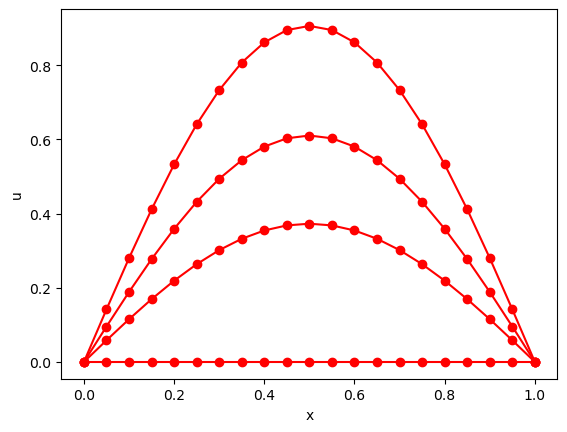

In [24]:
import math
import matplotlib.pylab as plt
PI = 3.1415926
numPoints = 20
alpha = 1.0
t = [0.01,0.05,0.1,100]
x = []
y = []
for n in t:
    for i in range(0,numPoints+1):
        x.append(float(i)/float(numPoints))
        #y.append(math.sin(PI*x[i]) * math.exp(-alpha*n*n))
        y.append(math.sin(PI*x[i]) * math.exp(-alpha*PI*PI*n))
    plt.plot(x,y,color='red',marker="o")
    x = []
    y = []

plt.xlabel('x')
plt.ylabel('u')
plt.axis('tight')
plt.show()

***Übung HA08: Numerische Lösung der Diffusiongleichung mit der expliziten Finiten-Differenzen-Methode***

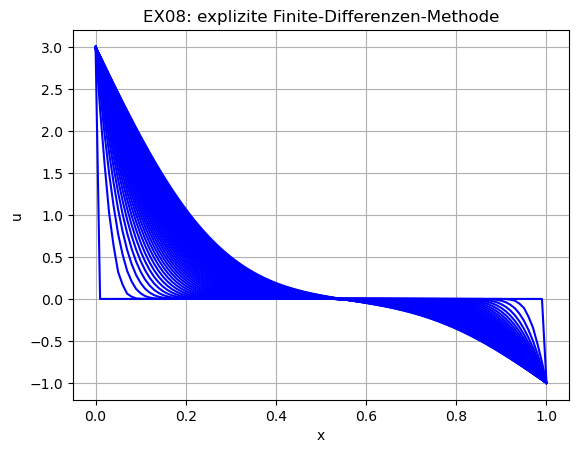

In [1]:
import math
import numpy as np
import matplotlib.pylab as plt
#data structures
##physical parameter
alpha = 1.0
##numerical parameters (discretization)
nx = 100
x = np.zeros(nx+1)
dx = 1./nx
t = [0.01]
nt = 500 #wieviele Zeitschritte bis zum stationären Zustand
dt = 0.48 * dx*dx / alpha #Zeitschritt muss kleiner als 1/2* Neumann-Kriterium sein. Dann sieht es wie in Grafik aus
Ne = alpha * dt / (dx*dx)
##field function
u = np.zeros(nx+1)
uo = np.zeros(nx+1)
#initial condition
u_ic = 0.
for i in range(nx+1):
	x[i] = 0
	u[i] = 0
	uo[i] = 0
#boundary conditions
u_bc_l = 3.
u_bc_r = -1.
u[0] = uo[0] = u_bc_l
u[nx] = uo[nx] = u_bc_r
#initial state
for i in range(0,nx+1):
    x[i] = (float(i)/float(nx))
plt.plot(x,u,color='blue')
#fdm-explicit
for n in range(1,nt):
	for i in range(1,nx):
		u[i] = uo[i] + Ne *(uo[i-1] - 2*uo[i] + uo[i+1])
	if(n % 10 == 0): 
	    plt.plot(x,u,color='blue')
	for i in range(1,nx):
		uo[i] = u[i]
#plots
plt.title('EX08: explizite Finite-Differenzen-Methode')
plt.xlabel('x')
plt.ylabel('u')
plt.axis('tight')
plt.grid()
plt.savefig("fdm-explicit.png")
plt.show()

***Übung HA11: Gerinnehydraulik***

<!--- Formeln --->
**Problemstellung**
* siehe Vorlesungen 13 und 14 (https://www.overleaf.com/read/qttmjpfhtwjj)

**Lösung**
* Newton-Verfahren
<hr>


In [8]:
#os.system("a.exe")
#Starten eines ausführbaren Programms aus einem Jupyter Notebook
!g++ gerinnehydraulik.cpp
! ./a.out

1.09429
0.837513
0.67501
0.562005
0.478426
0.413885
0.362434
0.320406
0.285409
0.255811
0.230456
0.208502
0.18932
0.172429
0.157454
0.144102
0.132133
0.121356
0.111613
0.102772
0.0947246
0.0873775
0.0806523
0.0744816
0.0688075
0.0635799
0.0587549
0.0542943
0.0501646
0.046336
0.0427821
0.0394797
0.0364077
0.0335474
0.0308821
0.0283965
0.0260769
0.023911
0.0218874
0.0199959
0.0182271
0.0165725
0.0150242
0.0135751
0.0122184
0.0109482
0.00975878
0.00864497
0.00760198
0.00662536
0.00317184
0.000644247
52

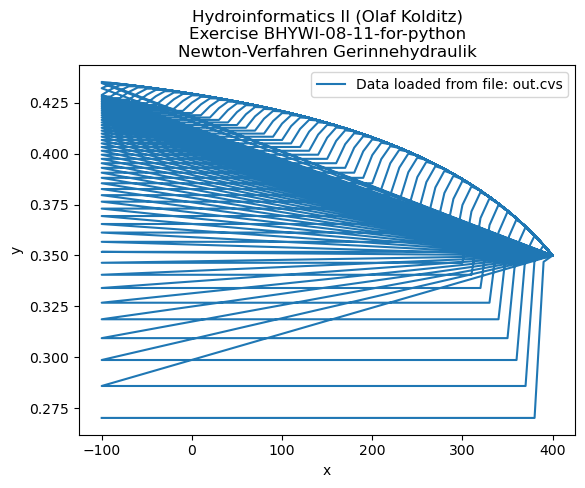

In [1]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('out.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))

plt.plot(x,y, label='Data loaded from file: out.cvs')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hydroinformatics II (Olaf Kolditz)\nExercise BHYWI-08-11-for-python\nNewton-Verfahren Gerinnehydraulik')
plt.legend()
plt.savefig("gerinne.png")
plt.show()

In [2]:
import datetime
x = datetime.datetime.now()
print(x) 

2025-07-11 12:34:00.380007
